In [16]:
import numpy as np,pandas as pd,os
import matplotlib.pyplot as plt
import seaborn as sns
dfm=pd.read_csv(r'E:\Batch 52- Day10\Advertising_data.csv')
print(dfm)
#TV RADIO NEWSPAPER ARE INDEPENDENT VARIABLE AND Y=SALES IS DEPENDENT ON X=TV,RADIO,NEWSPAPER

        TV  radio  newspaper  sales
0    230.1   37.8       69.2   2210
1     44.5   39.3       45.1   1040
2     17.2   45.9       69.3    930
3    151.5   41.3       58.5   1850
4    180.8   10.8       58.4   1290
..     ...    ...        ...    ...
195   38.2    3.7       13.8    760
196   94.2    4.9        8.1    970
197  177.0    9.3        6.4   1280
198  283.6   42.0       66.2   2550
199  232.1    8.6        8.7   1340

[200 rows x 4 columns]


<AxesSubplot:xlabel='TV'>

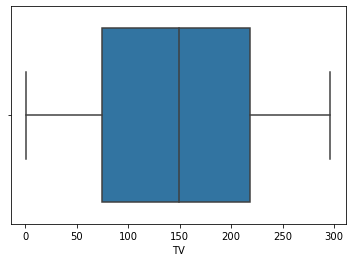

In [17]:
sns.boxplot(x=dfm['TV'])

In [18]:
dfm.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


In [19]:
dfm[dfm.radio==0]

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,880


<AxesSubplot:xlabel='radio'>

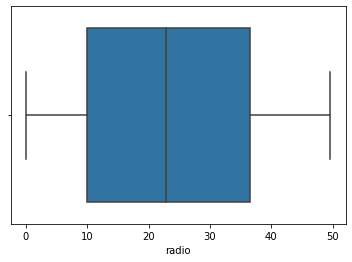

In [20]:
sns.boxplot(x=dfm['radio'])

<AxesSubplot:xlabel='newspaper'>

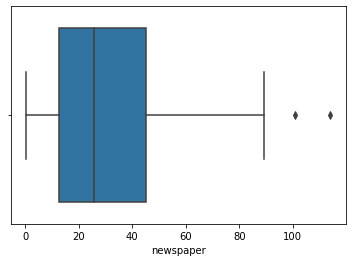

In [21]:
sns.boxplot(x=dfm['newspaper'])

In [22]:
dfm.newspaper=np.log10(dfm.newspaper)


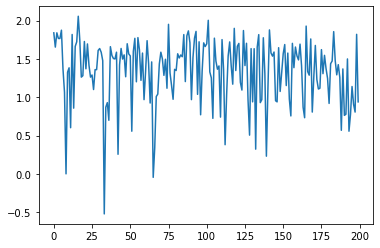

In [23]:
plt.plot(dfm['newspaper'])

In [24]:
dfm.mean()

TV            147.042500
radio          23.264000
newspaper       1.335836
sales        1402.250000
dtype: float64

<AxesSubplot:xlabel='newspaper'>

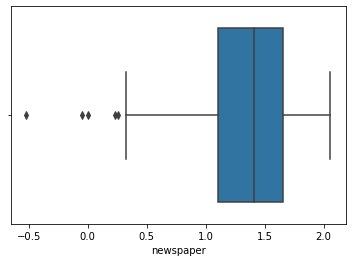

In [25]:
dfm[(dfm.newspaper)>90]
sns.boxplot(x=dfm['newspaper']) #There is no outlier

In [26]:
#Creating X and Y Variables
x=dfm.iloc[:,0:3].values
y=dfm.iloc[:,-1:].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x,y,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

89.26848963832634

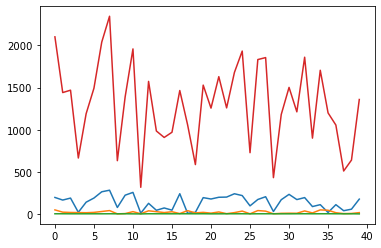

In [28]:
plt.plot(x_test)
plt.plot(reg.predict(x_test))

In [29]:
from sklearn.preprocessing import MinMaxScaler as mms
x_mms=mms().fit_transform(x)
y_mms=mms().fit_transform(y)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x_mms,y_mms,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

89.26848963832633

In [31]:
from sklearn.preprocessing import Normalizer as nml
x_nml=mms().fit_transform(x)
y_nml=mms().fit_transform(y)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x_nml,y_nml,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

89.26848963832633

In [33]:
#Converting Standard Diviation 
from sklearn.preprocessing import StandardScaler as sc
x_std=sc().fit_transform(x)
y_std=sc().fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x_std,y_std,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

89.26848963832633

In [35]:
#Regression Results

In [36]:
#x and y
x_opt=x[:,[0,1,2]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              4337.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                   1.42e-179
Time:                        18:09:20   Log-Likelihood:                         -1325.3
No. Observations:                 200   AIC:                                      2657.
Df Residuals:                     197   BIC:                                      2667.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
x_opt=x_std[:,[0,1,2]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y_std, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              573.4
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                    4.90e-97
Time:                        18:09:21   Log-Likelihood:                         -56.248
No. Observations:                 200   AIC:                                      118.5
Df Residuals:                     197   BIC:                                      128.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
x_opt=x_mms[:,[0,1,2]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y_mms, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              4121.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                   2.01e-177
Time:                        18:09:21   Log-Likelihood:                          258.59
No. Observations:                 200   AIC:                                     -511.2
Df Residuals:                     197   BIC:                                     -501.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [39]:
x_opt=x_nml[:,[0,1,2]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y_nml, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              4121.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                   2.01e-177
Time:                        18:09:21   Log-Likelihood:                          258.59
No. Observations:                 200   AIC:                                     -511.2
Df Residuals:                     197   BIC:                                     -501.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [40]:
#Conclusion of Sales
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x_std[:,0:1],y_std,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred)*100,'% is Depending on TV')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x_std[:,1:2],y_std,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred)*100,'% is Depending on radio')
x_train,x_test,y_train,y_test =train_test_split (x_std[:,2:3],y_std,test_size = 0.2,random_state=33)
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred= reg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred)*100,'% is Depending on NewsPaper')

64.5721873526932 % is Depending on TV
37.22141008698516 % is Depending on radio
-0.09407497708173729 % is Depending on NewsPaper
